In [273]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [274]:
import numpy as np
import pandas as pd 


In [275]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [276]:
dataset_path = './datasets-location_C/room_climate-location_C-measurement05.csv'
df = pd.read_csv(dataset_path)

df.head()

,1,1485441852008,2,5,21.85,43.020,182.86,542.8,0,0.1,0.2,0.3
0,2,1485441852248,2,4,22.10,38.930,268.57,993.6,0,0,0,0
1,3,1485441852518,3,1,22.12,41.846,148.57,441.6,0,0,0,0
2,4,1485441852603,3,2,22.02,51.485,194.29,538.2,0,0,0,0
3,5,1485441852650,3,3,22.10,36.176,192.86,565.8,0,0,0,0
4,6,1485441855874,6,5,21.85,43.020,182.86,542.8,0,0,0,0


In [277]:
columns = ["EID", "AbsT", "RelT", "NID",
           "Temp", "RelH", "L1", "L2",
           "Occ", "Act", "Door", "Win"]

df = pd.read_csv(dataset_path, header=None, names=columns)
df.head()

,EID,AbsT,RelT,NID,Temp,RelH,L1,L2,Occ,Act,Door,Win
0,1,1485441852008,2,5,21.85,43.020,182.86,542.8,0,0,0,0
1,2,1485441852248,2,4,22.10,38.930,268.57,993.6,0,0,0,0
2,3,1485441852518,3,1,22.12,41.846,148.57,441.6,0,0,0,0
3,4,1485441852603,3,2,22.02,51.485,194.29,538.2,0,0,0,0
4,5,1485441852650,3,3,22.10,36.176,192.86,565.8,0,0,0,0


In [278]:
df.isna().sum()

EID     0
AbsT    0
RelT    0
NID     0
Temp    0
RelH    0
L1      0
L2      0
Occ     0
Act     0
Door    0
Win     0
dtype: int64

Part A

In [279]:
features = ["Temp", "RelH", "L1", "L2"]
label = "Temp"

data = df[features].values


In [280]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)


In [281]:
seq_length = 20   # number of time steps

X = []
y = []

for i in range(len(scaled) - seq_length):
    X.append(scaled[i:i+seq_length])
    y.append(scaled[i+seq_length][0])   # temperature column index=0

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (1480, 20, 4)
y shape: (1480,)


In [282]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [283]:
model = Sequential([
    GRU(64, return_sequences=False, input_shape=(seq_length, X.shape[2])),
    Dropout(0.3),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse")
model.summary()


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_7 (GRU)                     │ (None, 64)             │        13,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,505 (52.75 KB)

 Trainable params: 13,505 (52.75 KB)

 Non-trainable params: 0 (0.00 B)

In [284]:
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1057 - val_loss: 0.1013
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0730 - val_loss: 0.0860
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0716 - val_loss: 0.0880
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0678 - val_loss: 0.0827
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0689 - val_loss: 0.0845
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0647 - val_loss: 0.0775
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0663 - val_loss: 0.0982
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0639 - val_loss: 0.0851
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0620 - val_loss: 0.0732
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0625 - val_loss: 0.0854
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0629 - val_loss: 0.0834
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0614 - val_l

Part B Plotting Graph

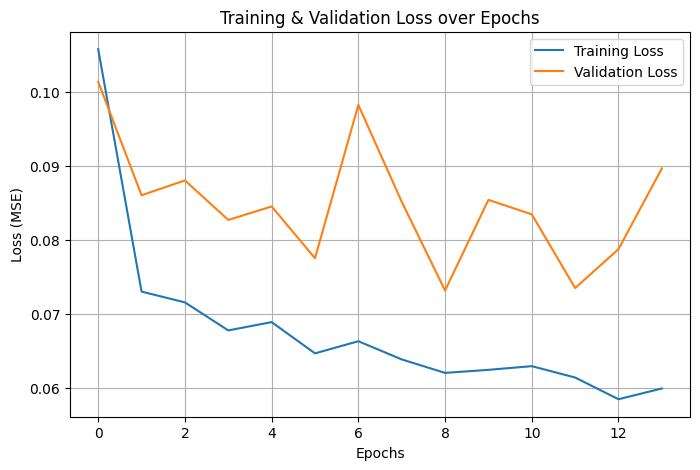

In [285]:
plt.figure(figsize=(8,5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training & Validation Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.show()


Training Loss goes down steadily. This shows the model is learning, but slowly.

Validation Loss is  unstable and goes down so much. It goes up and down so much which might be high variance which means:

- learning rate too high
- insufficient regularization
- batch size too small


Validation loss is consistently higher than train loss. It might be underfitting, not overfitting because validation loss isn’t steadily increasing

In [286]:
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Test MSE:", test_loss)

y_pred = model.predict(X_test)

Test MSE: 0.07426577806472778
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [287]:
import numpy as np
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("RMSE:", rmse)


RMSE: 0.2725174830220561


Part C Hyperparameter

In [288]:
from tensorflow.keras.optimizers import Adam


In [289]:
def build_model(hp):
    model_2 = Sequential()
    model_2.add(GRU(
        units=hp.Int("units", min_value=32, max_value=128, step=32),
        return_sequences=False,
        input_shape=(seq_length, X.shape[2])
    ))
    
    model_2.add(Dropout(
        hp.Float("dropout", min_value=0.1, max_value=0.5, step=0.1)
    ))

    model_2.add(Dense(1))

    lr = hp.Float("learning_rate", 1e-5, 1e-2, sampling="log")

    optimizer = Adam(learning_rate=lr)

    hp.Choice("batch_size", [16, 32, 64, 128])

    model_2.compile(
        optimizer=optimizer,
        loss="mse",
        metrics=["mse"]
    )

    return model_2


In [290]:
tuner = RandomSearch(
    build_model,
    objective="val_loss",
    max_trials=30,
    executions_per_trial=2,
    directory="tuning",
    project_name="temp_forecast"
)


Reloading Tuner from tuning\temp_forecast\tuner0.json


In [291]:
best_hp = tuner.get_best_hyperparameters()[0]

tuner.search(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    callbacks=[EarlyStopping(monitor="val_loss", patience=5)]
)



In [292]:
best_hp = tuner.get_best_hyperparameters()[0]
best_model_2 = tuner.hypermodel.build(best_hp)

history = best_model_2.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=best_hp.get("batch_size"),
    callbacks=[EarlyStopping(patience=7, restore_best_weights=True)],
)


Epoch 1/100


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1034 - mse: 0.1034 - val_loss: 0.1499 - val_mse: 0.1499
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0995 - mse: 0.0995 - val_loss: 0.1412 - val_mse: 0.1412
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0946 - mse: 0.0946 - val_loss: 0.1345 - val_mse: 0.1345
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0910 - mse: 0.0910 - val_loss: 0.1288 - val_mse: 0.1288
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0910 - mse: 0.0910 - val_loss: 0.1242 - val_mse: 0.1242
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0870 - mse: 0.0870 - val_loss: 0.1205 - val_mse: 0.1205
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0893 - mse: 0.0893 - val_loss: 0.1171 - val_mse: 0.1171
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0878 - mse: 0.0878 - val_loss: 0.1143 - val_mse: 0.1143
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0851 - mse: 0.0

Plotting Graph

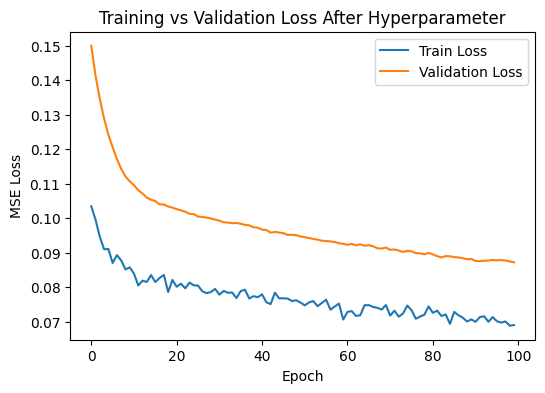

In [293]:
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss After Hyperparameter")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()


The plot suggests that the training process is stable, with both training and validation losses decreasing and leveling off without signs of overfitting. The model appears to be well-tuned and generalizes effectively to validation data after around 40 epochs.

The MSE might be a little higher than before but that doesn't mean a bad thing

Part D First Test Csv File

In [294]:
test_loss_2 = best_model_2.evaluate(X_test, y_test)
print("Test MSE:", test_loss_2)
y_pred_2 = best_model_2.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0860 - mse: 0.0860 
Test MSE: [0.08599035441875458, 0.08599035441875458]
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


The loss plot shows stable, converged training without overfitting. Hyperparameter tuning may initially select less aggressive models that generalize better but come with slightly higher loss.

In [295]:
import numpy as np
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred_2)
rmse = np.sqrt(mse)

print("RMSE:", rmse)


RMSE: 0.2932411196263777


Dataset 2

In [296]:

dataset_path_1 = './datasets-location_C/room_climate-location_C-measurement06.csv'
df_1 = pd.read_csv(dataset_path_1)

df_1.head()

,1,1485443107714,2,3,22.16,36.176,182.86,510.6,0,0.1,0.2,0.3
0,2,1485443107848,2,2,22.04,51.485,188.57,492.2,0,0,0,0
1,3,1485443108475,2,1,22.20,41.684,142.86,414.0,0,0,0,0
2,4,1485443108612,2,5,21.90,42.980,175.71,561.2,0,0,0,0
3,5,1485443108698,2,4,22.17,38.768,250.00,892.4,0,0,0,0
4,6,1485443111939,6,4,22.18,38.768,250.00,892.4,0,0,0,0


In [297]:
columns = ["EID", "AbsT", "RelT", "NID",
           "Temp", "RelH", "L1", "L2",
           "Occ", "Act", "Door", "Win"]

df_1 = pd.read_csv(dataset_path_1, header=None, names=columns)
df_1.head()

,EID,AbsT,RelT,NID,Temp,RelH,L1,L2,Occ,Act,Door,Win
0,1,1485443107714,2,3,22.16,36.176,182.86,510.6,0,0,0,0
1,2,1485443107848,2,2,22.04,51.485,188.57,492.2,0,0,0,0
2,3,1485443108475,2,1,22.20,41.684,142.86,414.0,0,0,0,0
3,4,1485443108612,2,5,21.90,42.980,175.71,561.2,0,0,0,0
4,5,1485443108698,2,4,22.17,38.768,250.00,892.4,0,0,0,0


In [298]:
features_1 = ["Temp", "RelH", "L1", "L2"]
label_1 = "Temp"

data_1 = df_1[features_1].values


In [299]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data_1)


In [300]:
seq_length = 20   # number of time steps

X = []
y = []

for i in range(len(scaled) - seq_length):
    X.append(scaled[i:i+seq_length])
    y.append(scaled[i+seq_length][0])   # temperature column index=0

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (1480, 20, 4)
y shape: (1480,)


In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [302]:
model_3 = Sequential([
    GRU(64, return_sequences=False, input_shape=(seq_length, X.shape[2])),
    Dropout(0.3),
    Dense(1)
])

model_3.compile(optimizer="adam", loss="mse")
model_3.summary()


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_9 (GRU)                     │ (None, 64)             │        13,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,505 (52.75 KB)

 Trainable params: 13,505 (52.75 KB)

 Non-trainable params: 0 (0.00 B)

In [303]:
from keras_tuner import RandomSearch

def build_model_3(hp):
    model_3 = Sequential()
    model_3.add(GRU(
        units=hp.Int("units", min_value=32, max_value=128, step=32),
        return_sequences=False,
        input_shape=(seq_length, X.shape[2])
    ))
    model_3.add(Dropout(hp.Float("dropout", 0.1, 0.5, step=0.1)))
    model_3.add(Dense(1))

    model_3.compile(
        optimizer="adam",
        loss="mse",
        metrics=["mse"]
    )
    return model_3



In [304]:
tuner = RandomSearch(
    build_model_3,
    objective="val_loss",
    max_trials=5,
    executions_per_trial=1,
    directory="tuning",
    project_name="temp_forecast"
)


Reloading Tuner from tuning\temp_forecast\tuner0.json


In [305]:
tuner.search(X_train, y_train, epochs=30, validation_split=0.2)
best_hp = tuner.get_best_hyperparameters()[0]

In [306]:
best_batch = 32  
history = model_3.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=best_batch,
    callbacks=[EarlyStopping(monitor="val_loss", patience=5)],
    verbose=1
)


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1674 - val_loss: 0.0906
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0844 - val_loss: 0.0976
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0799 - val_loss: 0.0896
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0794 - val_loss: 0.0886
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0758 - val_loss: 0.0839
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0772 - val_loss: 0.0869
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0739 - val_loss: 0.0792
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0748 - val_loss: 0.0876
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0739 - val_loss: 0.0819
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0745 - val_loss: 0.0853
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0722 - val_loss: 0.0773
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0715 - val_l

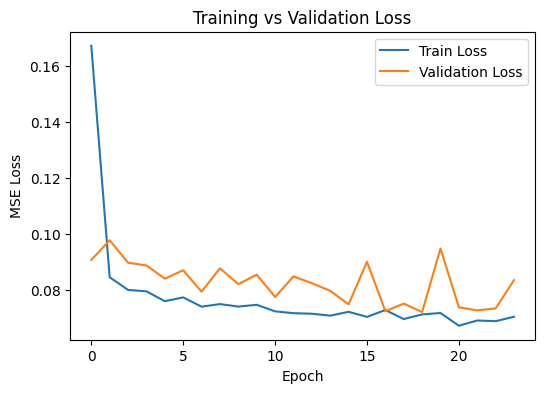

In [307]:
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()


Part D Test 2nd CSV File

In [308]:
test_loss = model_3.evaluate(X_test, y_test)
print("Test MSE:", test_loss)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0711 
Test MSE: 0.0711381807923317
